In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
taxi_data = pd.read_csv("taxi.csv")
taxi_data.head()
print(taxi_data.columns)

Index(['medallion', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'trip_time_in_secs', 'fare_amount', 'tip_amount'],
      dtype='object')


In [3]:
trips_data = pd.read_csv("trips.csv")
trips_data.head()
print(trips_data.columns)

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')


In [4]:
merge_data = pd.merge(trips_data, taxi_data)
print(merge_data.columns)

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'fare_amount', 'tip_amount'],
      dtype='object')


In [5]:
merge_data = merge_data.drop(['hack_license', 'vendor_id', 'rate_code', 'store_and_fwd_flag', 'passenger_count', 'tip_amount'], axis=1)
print(merge_data.columns)



Index(['medallion', 'pickup_datetime', 'dropoff_datetime', 'trip_time_in_secs',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount'],
      dtype='object')


In [6]:
merge_data = merge_data.dropna()
merge_data.head()


,medallion,pickup_datetime,dropoff_datetime,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
0,4D24F4D8EF35878595044A52B098DFD2,2013-01-13T10:23:00Z,2013-01-13T10:33:00Z,600,1.11,-73.946457,40.772728,-73.954819,40.777840,8.0
1,A49C37EB966E7B05E69523D1CB7BE303,2013-01-13T04:52:00Z,2013-01-13T05:06:00Z,840,5.35,-73.998268,40.740414,-73.984909,40.674999,18.0
2,1E4B72A8E623888F53A9693C364AC05A,2013-01-13T10:47:00Z,2013-01-13T10:48:00Z,60,0.50,-73.953461,40.775864,-73.955238,40.773216,3.5
3,F7E4E9439C46B8AD5B16AB9F1B3279D7,2013-01-13T11:14:00Z,2013-01-13T11:26:00Z,720,2.66,-73.981369,40.724731,-74.012932,40.717426,11.5
4,A9DC75D59E0EA27E1ED328E8BE8CD828,2013-01-13T11:24:00Z,2013-01-13T11:28:00Z,240,1.49,-73.967995,40.760002,-73.955513,40.776730,6.5


In [7]:
merge_data['medallion'].value_counts()

medallion
BCC1B5B7D9596FEC872C9DAD725310B3    15
723B5809862054401FA26A9219A45FC5    15
CBAAA9C7A2B8ADF468BA2477E22BD763    14
D6FDD900F5504C7FD5C0B999966E0F07    13
B6585890F68EE02702F32DECDEABC2A8    13
                                    ..
85E0A289F58009CF568A928219082EDC     1
6C0E03106318253CAD879114FC991B66     1
7A4720A674F0EDBF9E71EB37EF0DB47B     1
473E20C6CBE91A07C2CA161158E35AE4     1
A6DB36B570BD59E08FBE76086C5EE662     1
Name: count, Length: 12744, dtype: int64

In [8]:
merge_data.describe()

,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,757.281306,2.907660,-72.562461,39.825872,-72.539657,39.812613,12.443674
std,654.997964,3.377631,10.773865,7.837667,10.846693,7.872047,13.658216
min,0.000000,0.000000,-82.634415,-74.014969,-77.115440,-74.177155,0.000000
25%,365.000000,1.060000,-73.992294,40.734245,-73.991592,40.733475,6.500000
50%,600.000000,1.800000,-73.982025,40.752079,-73.980255,40.752808,9.500000
75%,960.000000,3.200000,-73.966904,40.767099,-73.963593,40.767857,14.000000
max,75240.000000,53.000000,40.811337,41.589775,40.859077,41.107189,2069.500000


In [9]:
print(merge_data.isnull().sum())

medallion            0
pickup_datetime      0
dropoff_datetime     0
trip_time_in_secs    0
trip_distance        0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
fare_amount          0
dtype: int64


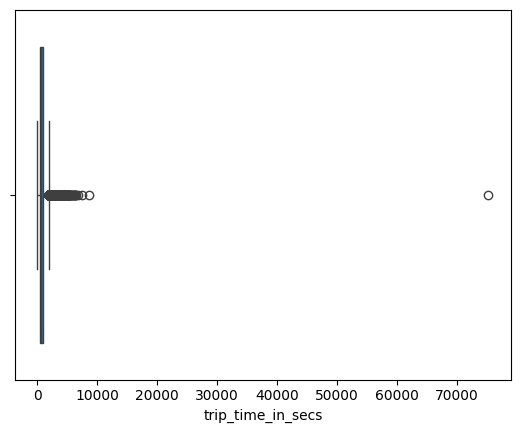

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=merge_data['trip_time_in_secs'])
plt.show()


In [11]:
merge_data = merge_data[merge_data['trip_time_in_secs'] < 7200]  # Remove trips longer than 4 hours


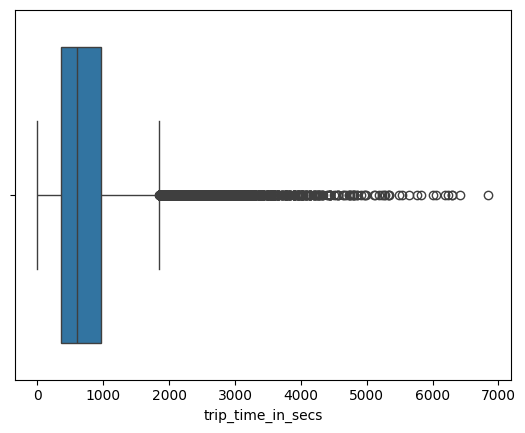

In [12]:
sns.boxplot(x=merge_data['trip_time_in_secs'])
plt.show()


In [13]:
merge_data.describe()

,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount
count,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000,49996.000000
mean,755.501400,2.906785,-72.563855,39.826631,-72.541058,39.813376,12.400947
std,562.103317,3.374326,10.769295,7.835876,10.842163,7.870268,10.092351
min,0.000000,0.000000,-82.634415,-74.014969,-77.115440,-74.177155,0.000000
25%,365.000000,1.060000,-73.992294,40.734245,-73.991594,40.733479,6.500000
50%,600.000000,1.800000,-73.982025,40.752077,-73.980259,40.752809,9.500000
75%,960.000000,3.200000,-73.966904,40.767101,-73.963593,40.767858,14.000000
max,6847.000000,53.000000,40.811337,41.589775,40.859077,41.107189,198.000000


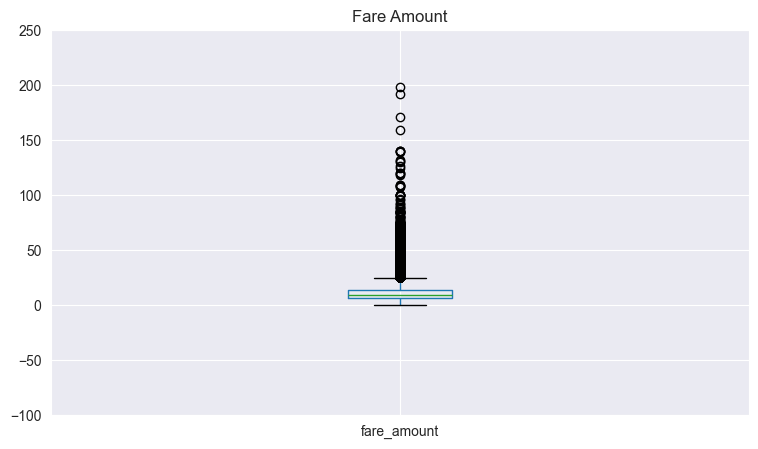

In [14]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

merge_data.boxplot(column='fare_amount', ax=ax)
ax.set_title('Fare Amount')
ax.set_ylim(-100, 250)


plt.show()

In [15]:
from geopy.distance import geodesic

merge_data['distance'] = merge_data.apply(lambda row: geodesic((row['pickup_latitude'], row['pickup_longitude']),
                                                                 (row['dropoff_latitude'], row['dropoff_longitude'])).miles, axis=1)


In [16]:
merge_data = merge_data[(merge_data['pickup_latitude'].between(40, 41)) & 
                          (merge_data['pickup_longitude'].between(-75, -72)) &
                          (merge_data['dropoff_latitude'].between(40, 41)) & 
                          (merge_data['dropoff_longitude'].between(-75, -72))]


In [17]:
merge_data.describe()

,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,distance
count,49064.000000,49064.000000,49064.000000,49064.000000,49064.000000,49064.000000,49064.000000,49064.000000
mean,756.538012,2.907307,-73.975036,40.750292,-73.974579,40.750887,12.331557,2.115389
std,560.117836,3.348193,0.035620,0.027614,0.034959,0.031232,9.746449,2.282912
min,0.000000,0.000000,-74.315605,40.127800,-74.315605,40.127800,0.000000,0.000000
25%,367.000000,1.060000,-73.992500,40.735573,-73.991791,40.734806,6.500000,0.801568
50%,602.000000,1.800000,-73.982254,40.752579,-73.980644,40.753477,9.500000,1.364479
75%,960.000000,3.200000,-73.968063,40.767456,-73.965116,40.768170,14.000000,2.485637
max,6847.000000,38.020000,-73.546356,40.913631,-72.688133,40.967796,159.500000,45.216778


In [18]:
merge_data.shape

(49064, 11)

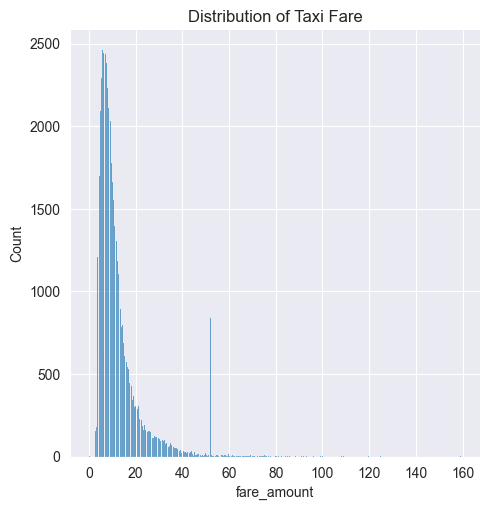

In [19]:
sns.displot(merge_data[merge_data['fare_amount']<200]['fare_amount'])
plt.title('Distribution of Taxi Fare')
plt.show()

In [20]:
from math import radians, sin, cos, sqrt, atan2
def haversine(lon1, lat1, lon2, lat2):
    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    r = 6371  # Radius of Earth in kilometers. Use 3956 for miles.
    return r * c


merge_data['distance'] = merge_data.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], 
                                                                  row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

print(merge_data["distance"])

0        0.904933
1        7.360460
2        0.330285
3        2.781201
4        2.136538
           ...   
49994    1.606161
49995    2.435582
49996    1.833472
49997    1.831398
49998    1.439256
Name: distance, Length: 49064, dtype: float64


In [21]:
merge_data['pickup_datetime'] = pd.to_datetime(merge_data['pickup_datetime'])

merge_data['pickup_hour'] = merge_data['pickup_datetime'].dt.hour
merge_data['pickup_day_of_week'] = merge_data['pickup_datetime'].dt.dayofweek
merge_data['pickup_month'] = merge_data['pickup_datetime'].dt.month
merge_data['pickup_day'] = merge_data['pickup_datetime'].dt.day
merge_data['pickup_is_weekend'] = merge_data['pickup_datetime'].dt.dayofweek >= 5


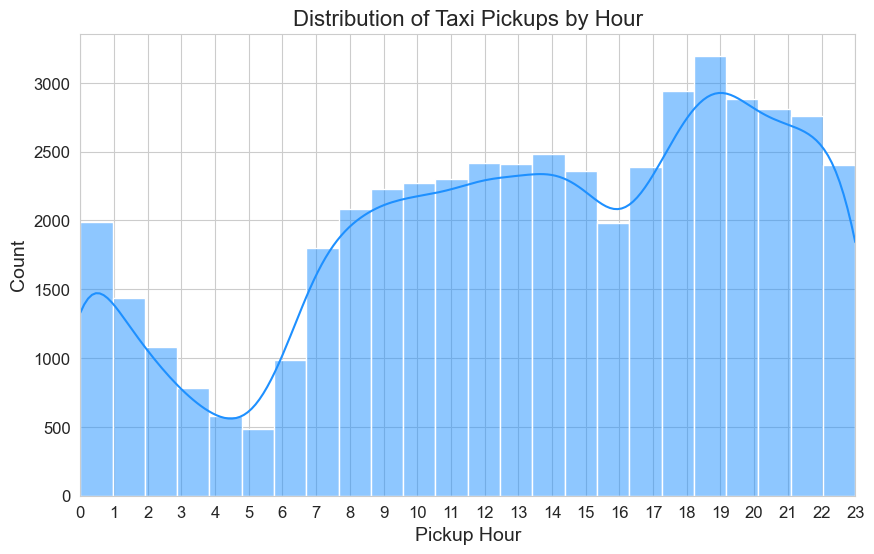

In [22]:


sns.set_style('whitegrid')

# Increase figure size
plt.figure(figsize=(10, 6))

# Plot the histogram with 24 bins, ensuring each hour is represented
sns.histplot(data=merge_data[merge_data['pickup_hour'] < 24], x='pickup_hour', bins=24, kde=True, color='dodgerblue')

# Add title and labels
plt.title('Distribution of Taxi Pickups by Hour', fontsize=16)
plt.xlabel('Pickup Hour', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Ensure x-axis limits reflect hours 0-23
plt.xlim(0, 23)

# Customize tick parameters
plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


In [23]:
from sklearn.model_selection import train_test_split

X = merge_data.drop(columns=['fare_amount'])  # Features
y = merge_data['fare_amount']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [24]:
X_train = X_train.drop(columns=['medallion'])
X_test = X_test.drop(columns=['medallion'])

X_train = X_train.drop(columns=['dropoff_datetime'])
X_test = X_test.drop(columns=['dropoff_datetime'])

X_train = X_train.drop(columns=['pickup_datetime'])
X_test = X_test.drop(columns=['pickup_datetime'])


In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Convert predictions and actual values to a DataFrame for easy comparison
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows
print(results.head())


       Actual  Predicted
40179    11.0  11.761690
11384    12.5  13.258088
25384    19.5  20.275943
33375     6.5   6.635870
723      14.0  15.265166


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.8372837542009375
Mean Squared Error (MSE): 11.111230193640134
Root Mean Squared Error (RMSE): 3.3333511956648274
R-squared (R²): 0.8899273767218964


c:\Users\ITWORK\Desktop\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


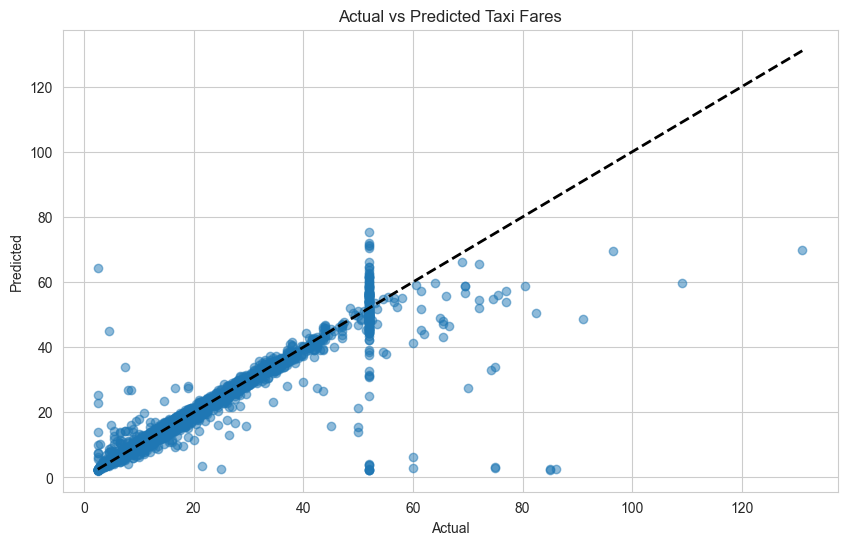

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Taxi Fares')
plt.show()


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [29]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

# Display the first few rows
print(results.head())

       Actual  Predicted
40179    11.0     10.885
11384    12.5     12.355
25384    19.5     19.725
33375     6.5      6.305
723      14.0     14.235


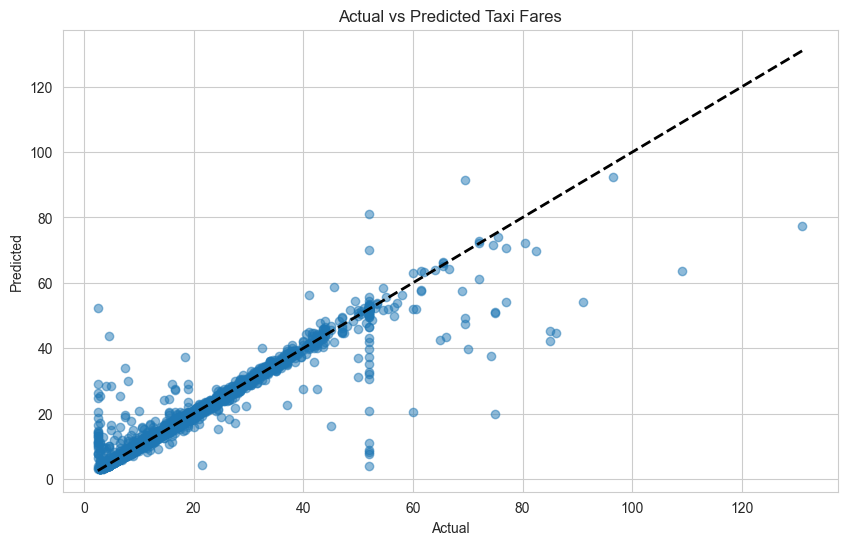

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Taxi Fares')
plt.show()

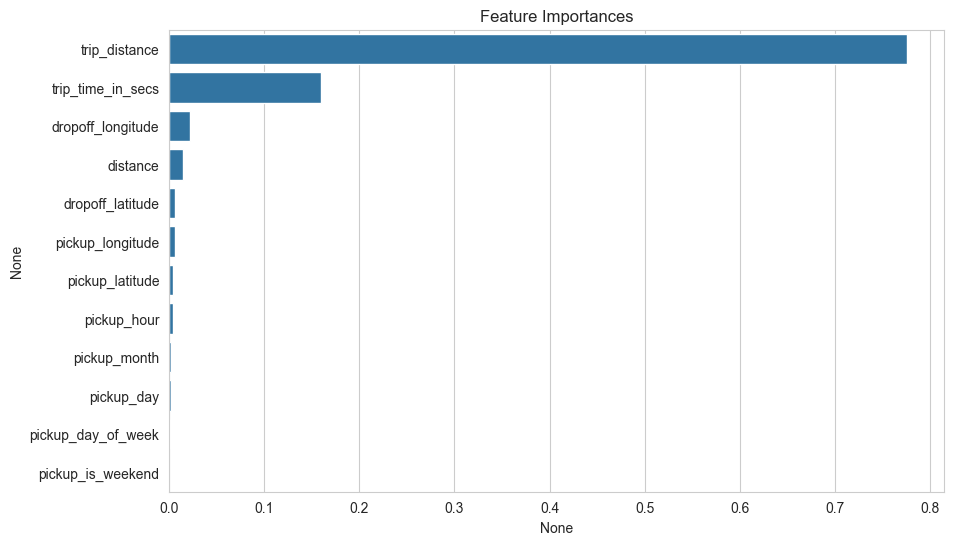

In [31]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()


In [36]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)


In [37]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})

# Display the first few rows
print(results.head())

       Actual  Predicted
40179    11.0  10.811747
11384    12.5  12.639028
25384    19.5  19.546776
33375     6.5   6.375459
723      14.0  14.251286


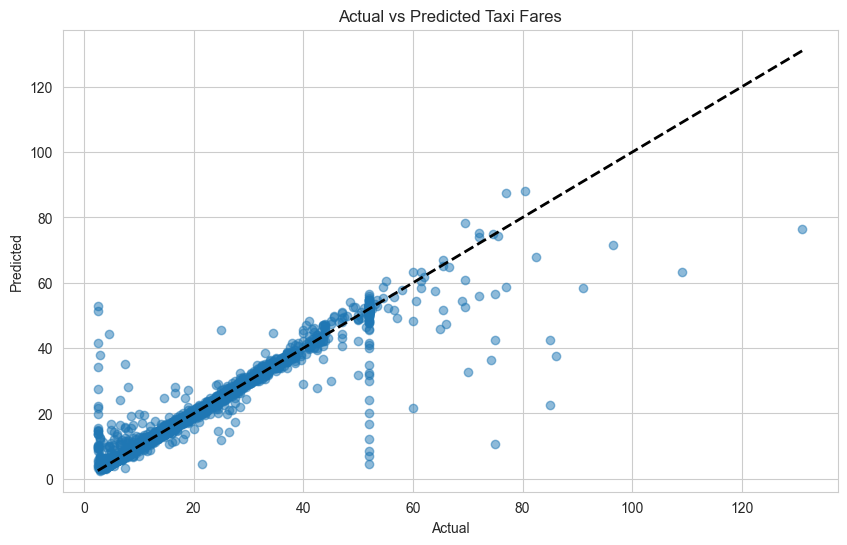

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Taxi Fares')
plt.show()

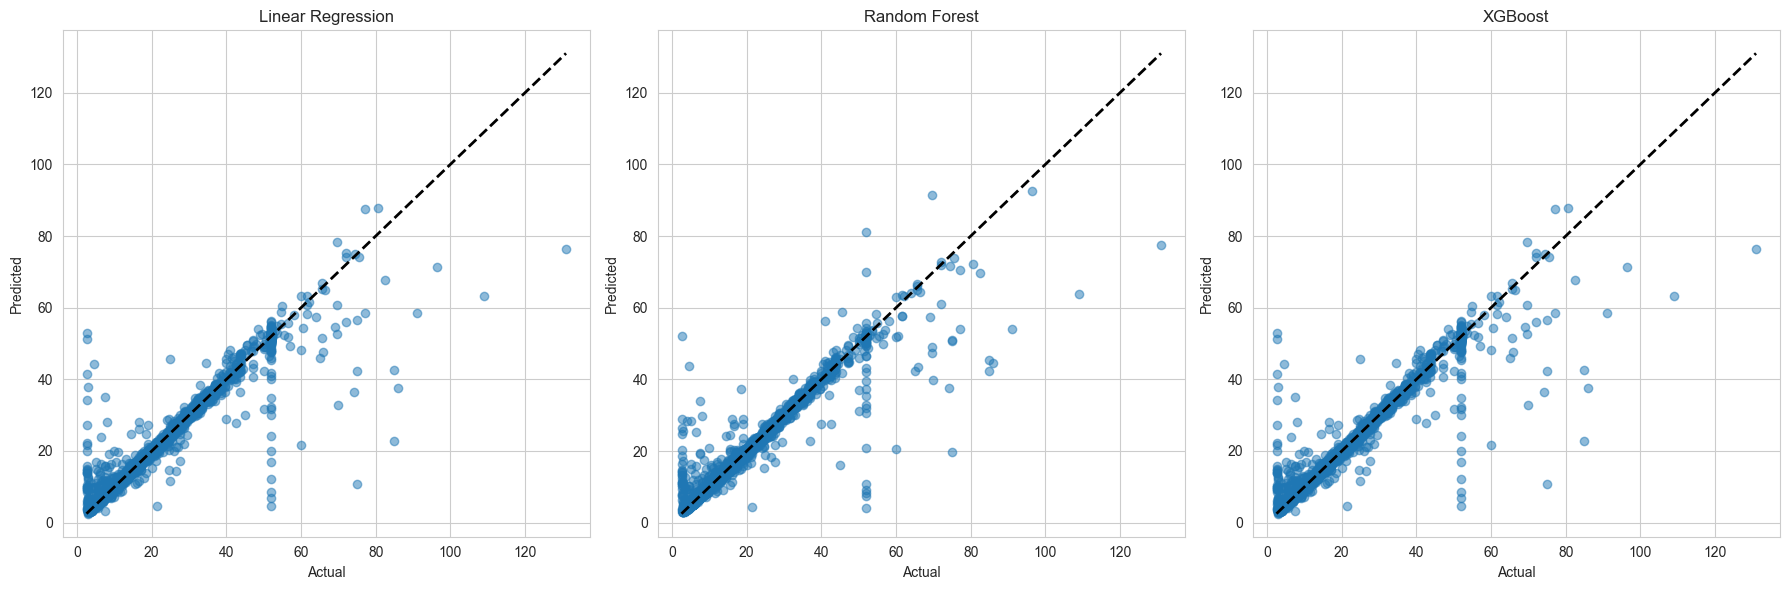

In [41]:
plt.figure(figsize=(18, 6))

# Plot 1: Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

# Plot 2: Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

# Plot 3: XGBoost
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost')

# Display the plots
plt.tight_layout()
plt.show()

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb)
    ],
    'MSE': [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_xgb)
    ],
    'RMSE': [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_xgb)
    ],
    'R²': [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb)
    ]
})

print(metrics)


               Model       MAE        MSE       RMSE        R²
0  Linear Regression  0.837284  11.111230  11.111230  0.889927
1      Random Forest  0.547497   5.827391   5.827391  0.942271
2            XGBoost  0.593692   6.490680   6.490680  0.935701


In [50]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [51]:
# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Best estimator
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred_rf = best_rf_model.predict(X_test)
# Evaluate the performance
print(f"Test MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Test R²: {r2_score(y_test, y_pred_rf)}")


Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test MSE: 5.646997647422699
Test MAE: 0.5679992348425186
Test R²: 0.9440584135271649


In [52]:
from sklearn.model_selection import cross_val_score

# Re-run cross-validation with the best parameters
best_rf_model = RandomForestRegressor(
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = (-cv_scores)**0.5

print(f"Cross-validated RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")


Cross-validated RMSE: 2.235901243706786 ± 0.1393066011766366
